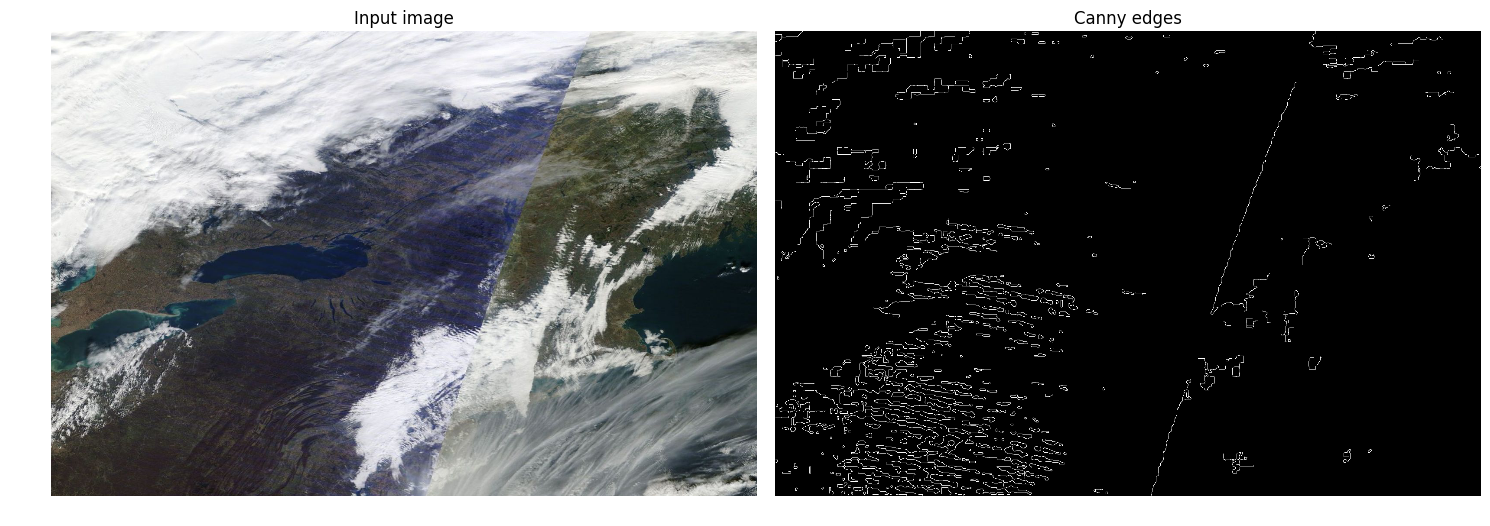

In [151]:
"""
1. Read image from file.
2. Convert to HSV color space/Gray
"""

import os
import numpy as np
import skimage
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.color import rgb2gray,rgb2hsv
from skimage.feature import canny
from skimage import data
from skimage import io

import matplotlib.pyplot as plt
from matplotlib import cm


filename = './2014/11.11.14.jpeg'
image = io.imread(filename)
image_hsv = rgb2hsv(image)
image_gray = rgb2gray(image)

for i in range(1076):
    for j in range(1629):
        image_gray[i,j] = image_hsv[i][j][0]


edges = canny(image_gray,1.4,0.2,0.98,None,True)

acc1, thetas1, rhos1 = hough_line(edges)

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

for a in ax:
    a.set_axis_off()
    a.set_adjustable('box-forced')

plt.tight_layout()
plt.show()


In [24]:
edges[1,2]

False

In [108]:
import numpy as np

def hough_line2(img):
  # Rho and Theta ranges
  thetas = np.deg2rad(np.arange(-90.0, 90.0))
  width, height = img.shape
  diag_len = np.ceil(np.sqrt(width * width + height * height))   # max_dist
  rhos = np.linspace(-diag_len, diag_len, diag_len * 2.0)

  # Cache some resuable values
  cos_t = np.cos(thetas)
  sin_t = np.sin(thetas)
  num_thetas = len(thetas)

  # Hough accumulator array of theta vs rho
  accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint64)
  y_idxs, x_idxs = np.nonzero(img)  # (row, col) indexes to edges

  # Vote in the hough accumulator
  for i in range(len(x_idxs)):
    x = x_idxs[i]
    y = y_idxs[i]

    for t_idx in range(num_thetas):
      # Calculate rho. diag_len is added for a positive index
      rho = round(x * cos_t[t_idx] + y * sin_t[t_idx]) + diag_len
      accumulator[rho, t_idx] += 1

  return accumulator, thetas, rhos

In [155]:
acc,thetas,rhos = hough_line2(edges)

/home/ramcha/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/ramcha/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [170]:
idx = np.argmax(acc1)
rho = rhos1[idx / acc1.shape[1]]
theta = thetas1[idx % acc1.shape[1]]

In [156]:
idx = np.argmax(acc)
rho = rhos[idx / acc.shape[1]]
theta = thetas[idx % acc.shape[1]]

In [171]:
angle = np.rad2deg(theta)
#angle = theta
slope = -np.cos(angle)/np.sin(angle)

In [172]:
angle

-90.0

In [173]:
intercept = (rho)/np.sin(angle)

In [174]:
slope

-0.50120278338015323

In [175]:
intercept

982.91750267915484

In [176]:
img1 = image_hsv.copy()
img2 = image_hsv.copy()

In [177]:
np.shape(img2)

(1076, 1629, 3)

In [178]:
a = img2[100,100]

In [179]:
img2[100,100,0]

0.16666666666666666

In [180]:
for i in range(1076):
    for j in range(1629):
        # y > mx + b => image 1 , else image 2
        if(i > slope*j + intercept):
            img2[i][j][2] = 0.0
        else:
            img1[i][j][2] = 0.0

In [181]:
img2r = color.hsv2rgb(img2)
img1r = color.hsv2rgb(img1)

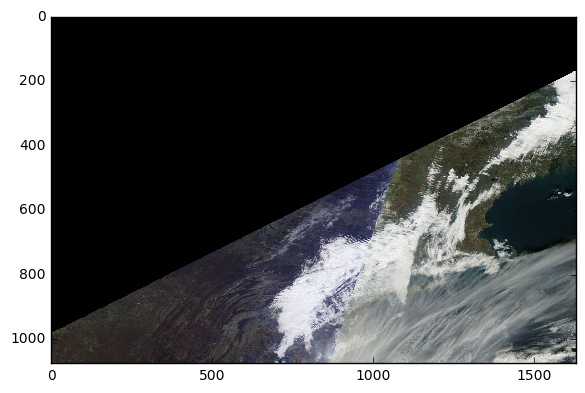

In [182]:
io.imshow(img1r)
plt.show()

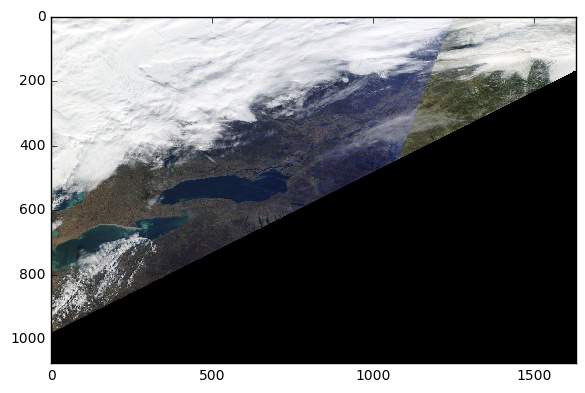

In [183]:
io.imshow(img2r)
plt.show()

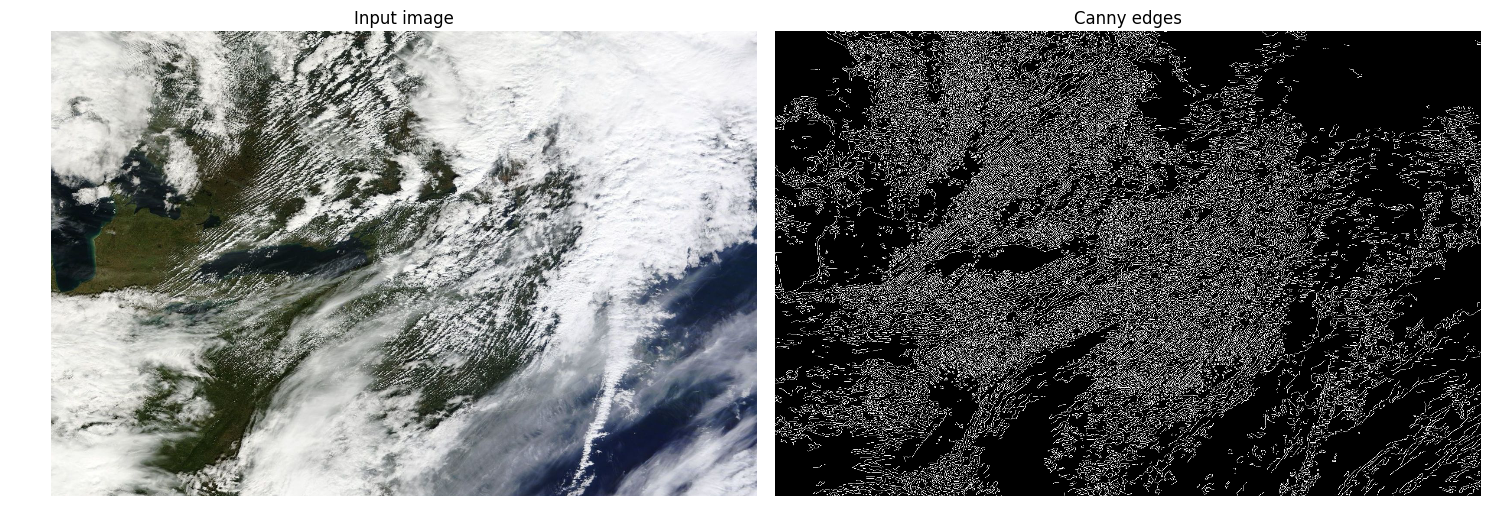

In [87]:
filename = './2014/10.7.14.jpeg'
image = io.imread(filename)
image1 = rgb2gray(image)
edges = canny(image1)

h, theta, d = hough_line(edges)

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

for a in ax:
    a.set_axis_off()
    a.set_adjustable('box-forced')

plt.tight_layout()
plt.show()
